In [8]:
from PIL import Image
import pygsp.graphs as graphs
import numpy as np
import matplotlib.pyplot as plt
import spectral_denoiser
import importlib

# Load Image

In [2]:
N = 80
True_Image = np.asarray(Image.open("noodle.jpg").resize((N,N)))
G = graphs.Grid2d(N)

# Gaussian Model

In [3]:
Denoising_Machine = spectral_denoiser.Spectral_Denoiser(G)

In [4]:
Noisy_Image = True_Image + np.random.randn(N,N,3)*100
Noisy_Reshaped = Noisy_Image.reshape(-1,3)

Denoised_Image = Denoising_Machine.remove_gaussian_noise(Noisy_Reshaped)
Denoised_Image_Reshaped = Denoised_Image.reshape(N,N,3)

2023-05-08 11:07:35,499:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


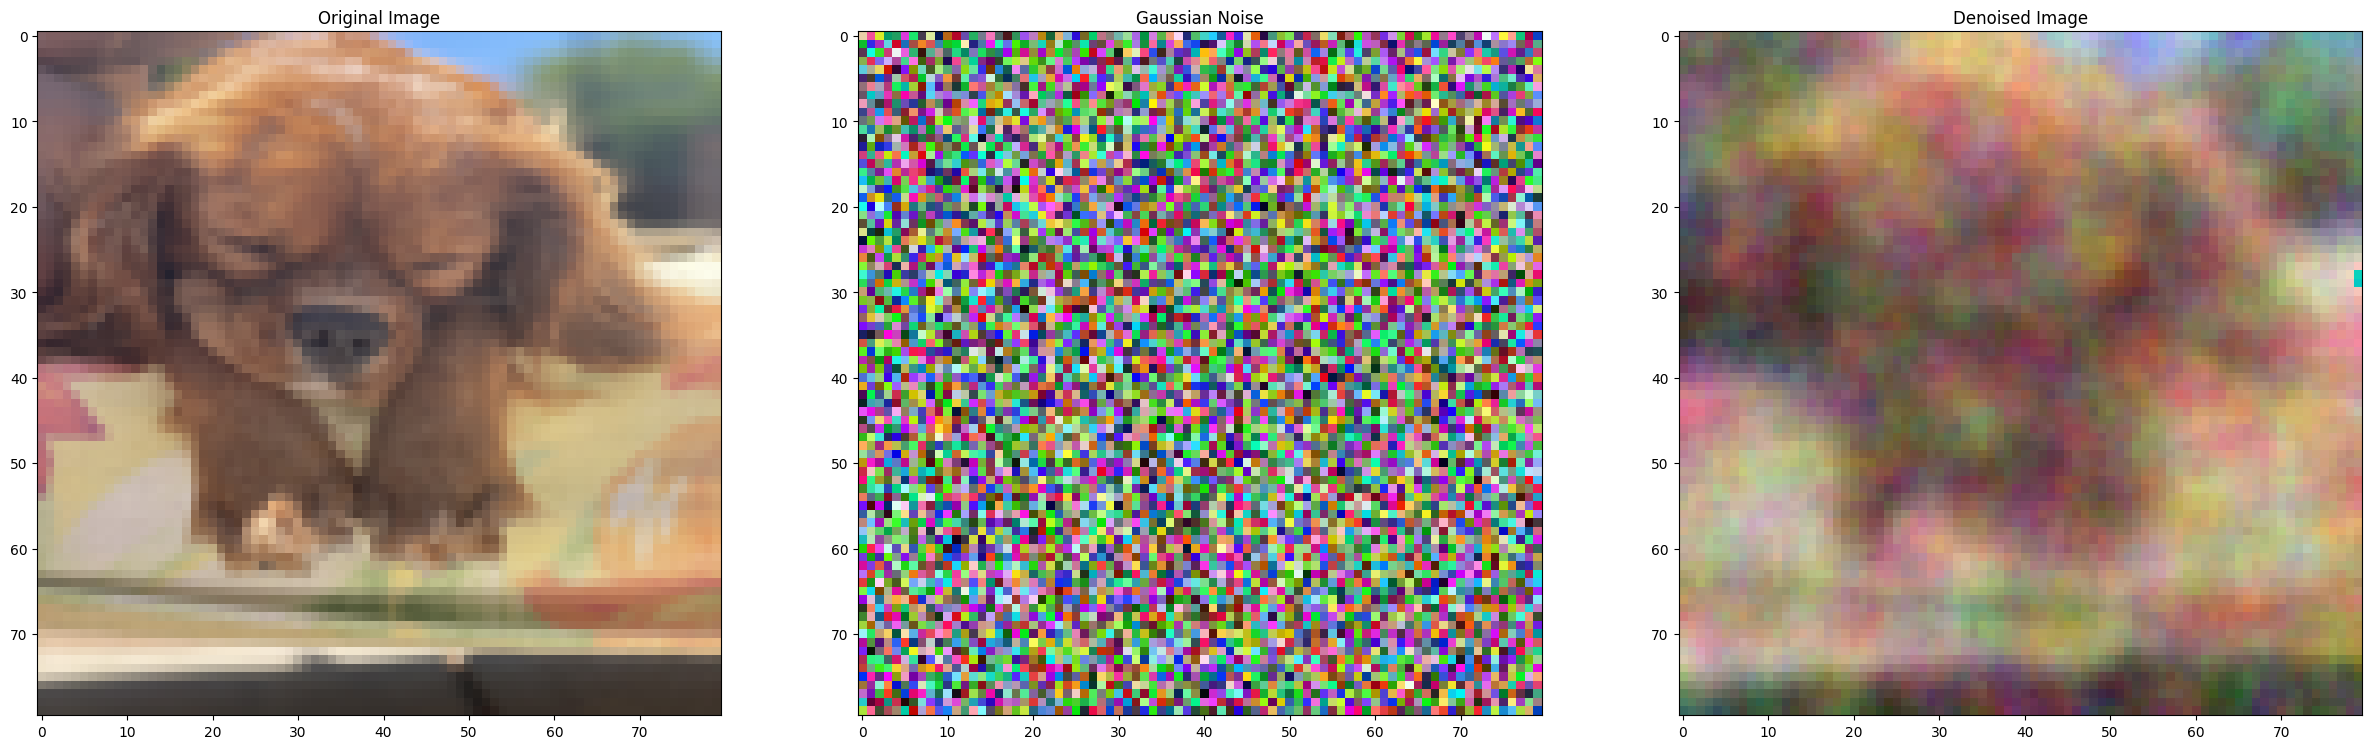

In [5]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].imshow(True_Image.astype(np.uint8))
ax[0].set_title("Original Image")
ax[1].imshow(Noisy_Image.astype(np.uint8))
ax[1].set_title("Gaussian Noise")
ax[2].imshow(Denoised_Image_Reshaped.astype(np.uint8))
ax[2].set_title("Denoised Image")
plt.show()

# Bernoulli Noise Model

In [6]:
Noisy_Image = True_Image * (np.random.randn(N,N,3) < -1.5)
Noisy_Reshaped = Noisy_Image.reshape(-1,3)

Denoised_Image = Denoising_Machine.remove_bernoulli_noise(Noisy_Reshaped, method = 'approximate', time = 500)
Denoised_Image_Reshaped = Denoised_Image.reshape(N,N,3)

100%|████████████████████████████████████████| 500/500 [00:02<00:00, 204.08it/s]


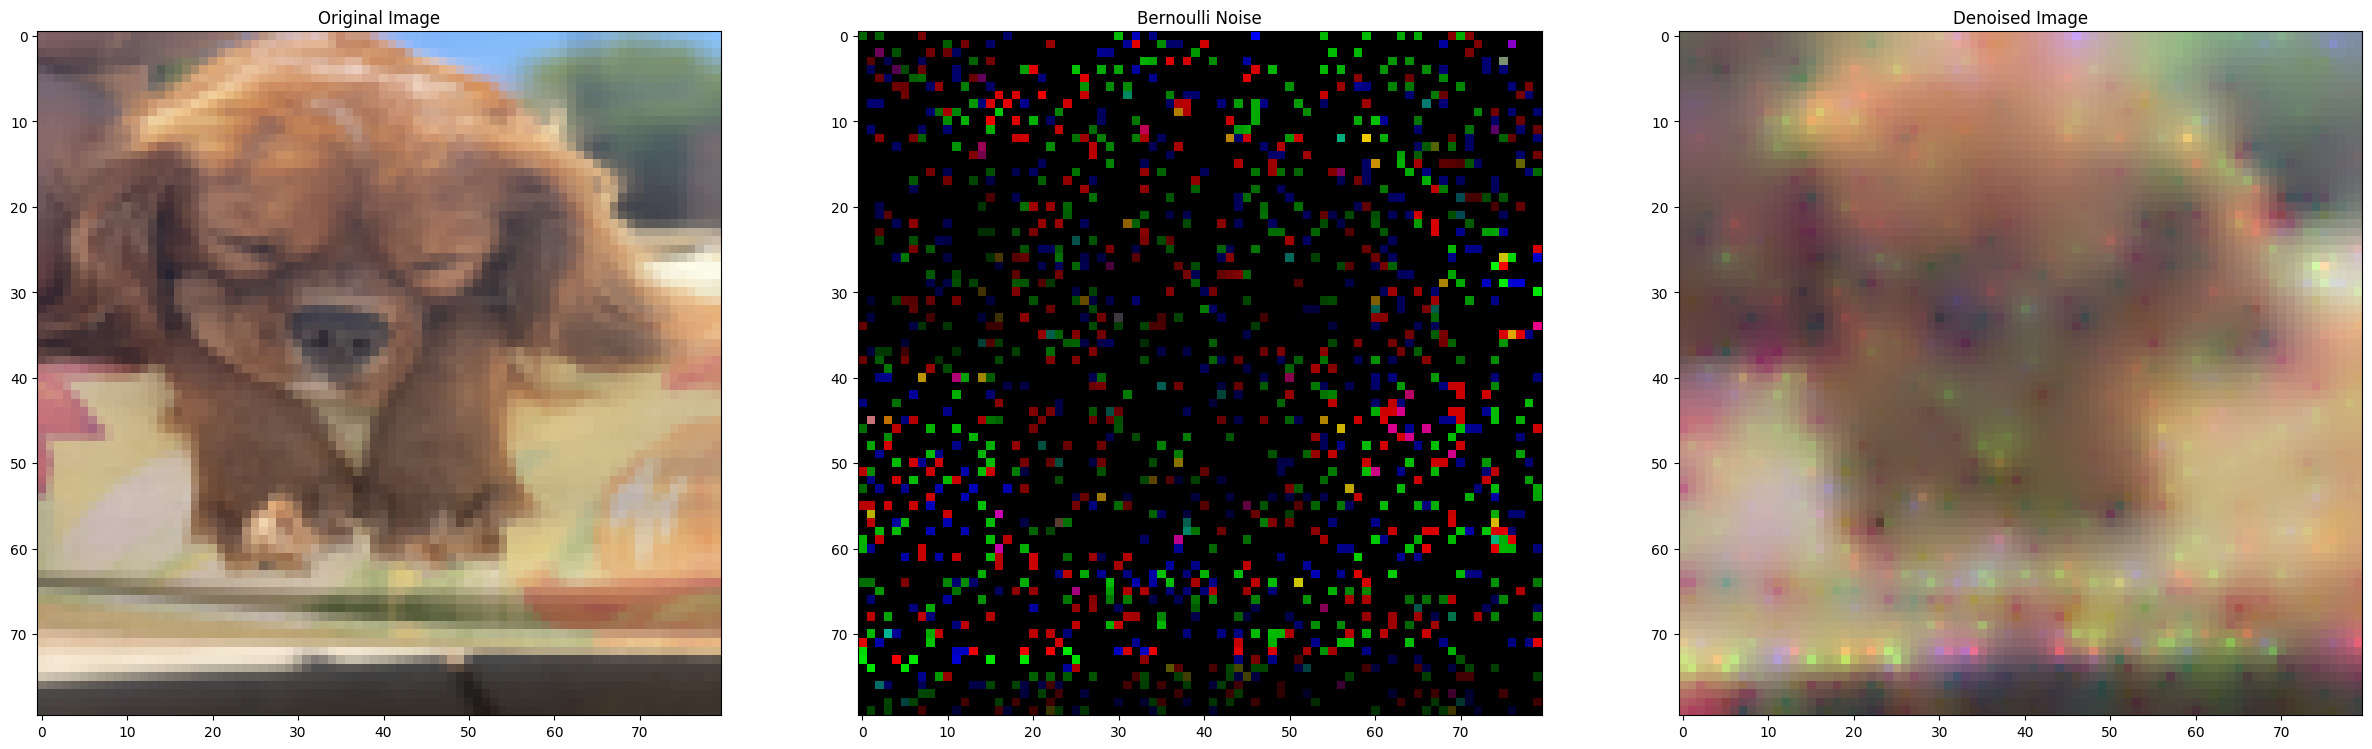

In [7]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].imshow(True_Image.astype(np.uint8))
ax[0].set_title("Original Image")
ax[1].imshow(Noisy_Image.astype(np.uint8))
ax[1].set_title("Bernoulli Noise")
ax[2].imshow(Denoised_Image_Reshaped.astype(np.uint8))
ax[2].set_title("Denoised Image")
plt.show()

# Uniform Noise Model

In [9]:
importlib.reload(spectral_denoiser)

<module 'spectral_denoiser' from '/Users/samuelleone/Documents/GitHub/Spectral-Denoising/spectral_denoiser.py'>

In [10]:
Noisy_Image = True_Image * np.random.uniform(0,1,N*N*3).reshape(N,N,3)
Noisy_Reshaped = Noisy_Image.reshape(-1,3)

In [11]:
Denoising_Machine = spectral_denoiser.Spectral_Denoiser(G)
Denoised_Image = Denoising_Machine.remove_uniform_noise(Noisy_Reshaped,eta=0.0002, max_iter=1000, epsilon=1e-3, method ='ccp')
Denoised_Image_Reshaped = Denoised_Image.reshape(N,N,3)

Truth unknown


ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cvxopt/cholmod.cpython-310-darwin.so, 0x0002): symbol not found in flat namespace '_cholmod_l_allocate_dense'

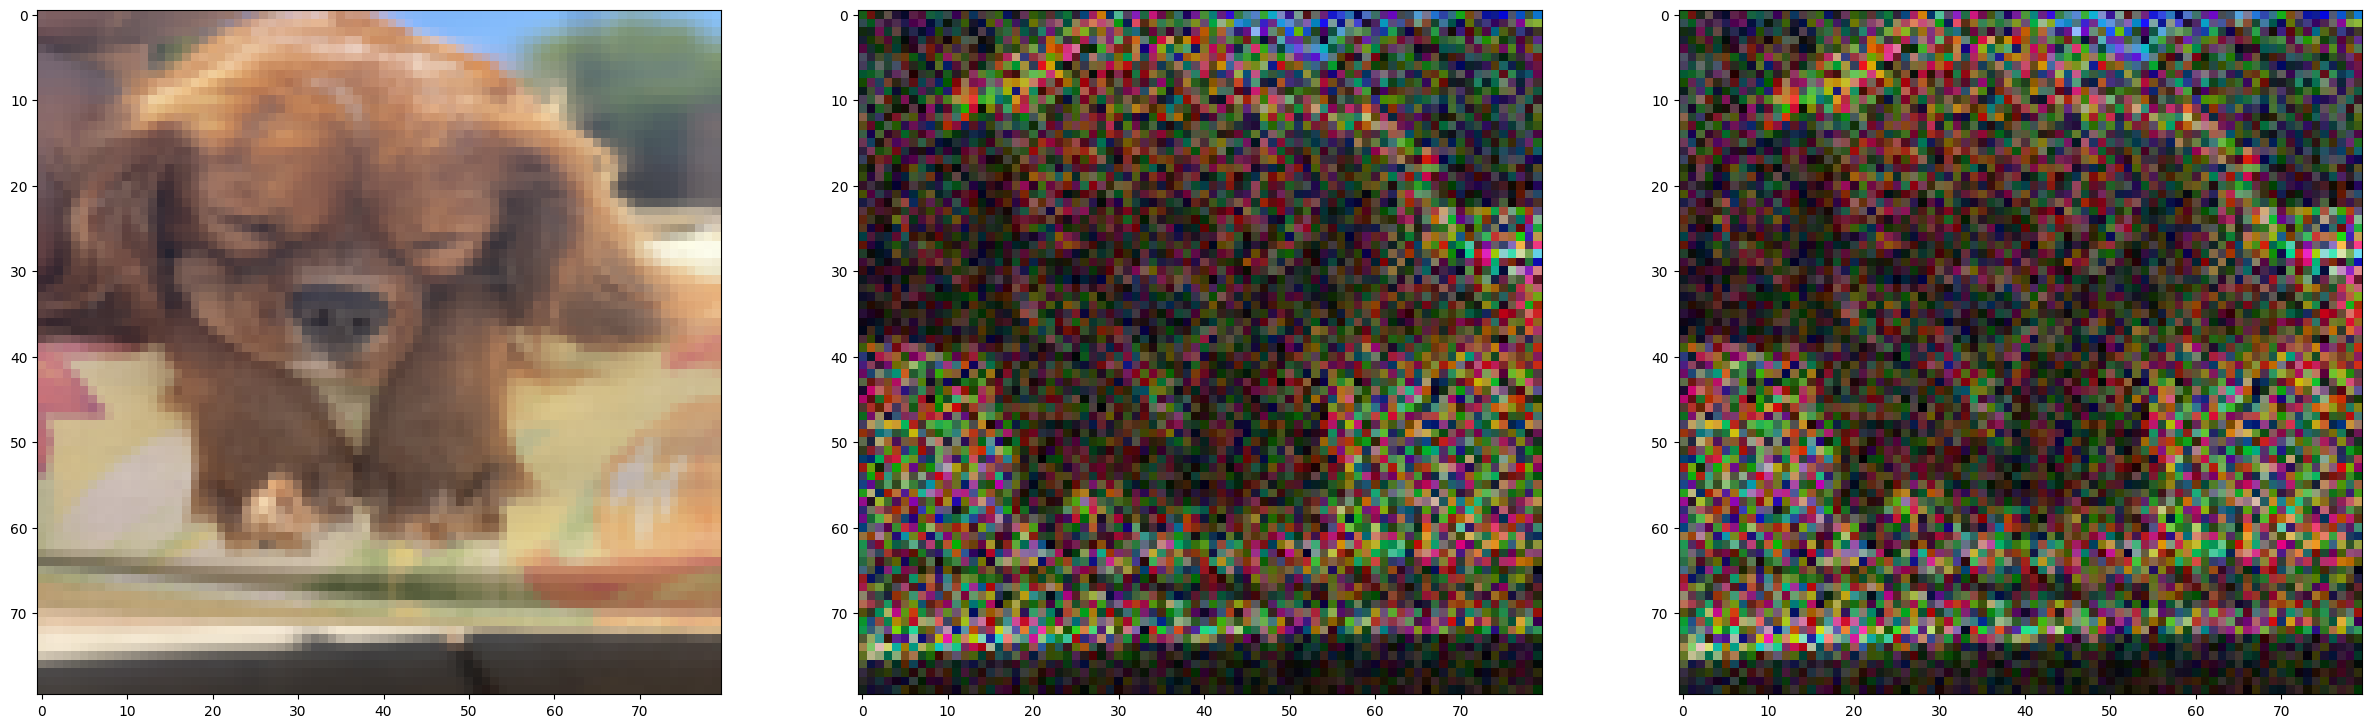

In [6]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].imshow(True_Image.astype(np.uint8))
ax[1].imshow(Noisy_Image.astype(np.uint8))
ax[2].imshow(Denoised_Image_Reshaped.astype(np.uint8))

(array([1.0000e+00, 5.0000e+00, 8.0000e+00, 1.4000e+01, 5.1000e+01,
        1.2100e+02, 3.1300e+02, 7.9700e+02, 2.9410e+03, 1.4949e+04]),
 array([0.5338332 , 0.58044988, 0.62706656, 0.67368324, 0.72029992,
        0.7669166 , 0.81353328, 0.86014996, 0.90676664, 0.95338332,
        1.        ]),
 <BarContainer object of 10 artists>)

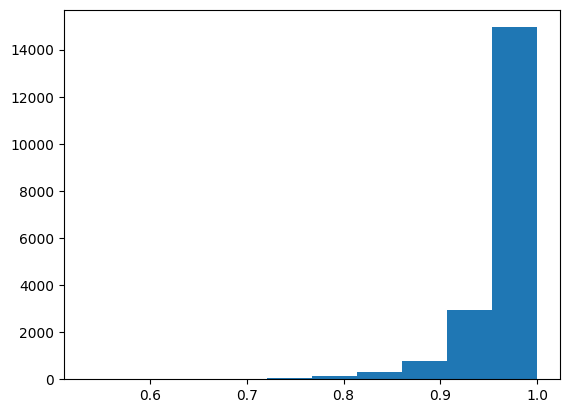

In [66]:
plt.hist((Noisy_Image/Denoised_Image_Reshaped).reshape(-1))